# Industry Preferences & Employment Impact Analysis

This notebook implements Section 5 of our analysis approach, focusing on industry preferences among entrepreneurs and their impact on employment.

## Objectives
- Analyze industry distribution across entrepreneur demographics
- Measure employment impact across different industries and entrepreneur types
- Identify high-growth industries for entrepreneurship
- Assess job creation potential by industry and entrepreneur characteristics

## Setup and Data Loading

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Data loading
gem_data = pd.read_csv('../data/Hackathon_GEM_Data_FULL.csv')
print(f"Dataset shape: {gem_data.shape}")
gem_data.head()

Dataset shape: (15868, 36)


,weight,new_entrepreneur,established_entrepreneur,knows_entrepreneur,local_opportunity,entrepreneurial_skill,fear_of_failure,wants_entrepreneurship,respects_entrepreneurship,follows_entrepreneurship,...,new_entrepreneur_owners,new_entrepreneur_external_sales,established_entrepreneur_external_sales,new_entrepreneur_innovation,year,new_entrepreneur_local_innovation,new_entrepreneur_employees,established_entrepreneur_employees,race,region
0,0.674020,No,No,No,No,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
1,0.674020,No,No,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
2,0.814409,No,Yes,No,No,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,1.0,White,Great Lakes
3,1.289586,No,No,No,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Great Lakes
4,0.963587,No,No,No,NaN,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Southeast


## Helper Functions for Weighted Analysis

In [2]:
def weighted_percentage(df, column, weights='weight'):
    """Calculate weighted percentages for column values"""
    value_counts = df.groupby(column)[weights].sum()
    total_weight = value_counts.sum()
    return (value_counts / total_weight * 100).sort_values(ascending=False)

def weighted_crosstab(df, row, col, weights='weight', normalize='index'):
    """Create weighted crosstab between two columns"""
    return pd.crosstab(
        index=df[row],
        columns=df[col],
        values=df[weights],
        aggfunc='sum',
        normalize=normalize
    ) * 100

## Data Preparation and Variable Exploration

In [3]:
# Identify industry and employment-related variables
industry_variables = [col for col in gem_data.columns if 'industry' in col]
employment_variables = [col for col in gem_data.columns if 'job' in col or 'employee' in col]

print("Industry-related variables:")
for var in industry_variables:
    print(f"- {var}")
    
print("\nEmployment-related variables:")
for var in employment_variables:
    print(f"- {var}")

# Create a filtered dataset for entrepreneurs with industry data
industry_data = gem_data[gem_data['new_entrepreneur'] == 'Yes'].dropna(subset=['new_entrepreneur_industry'])
print(f"\nEntrepreneurs with industry data: {len(industry_data)}")

# Examine distribution of industry variable
industry_distribution = industry_data['new_entrepreneur_industry'].value_counts()
print("\nDistribution of industry categories:")
print(industry_distribution)

Industry-related variables:
- new_entrepreneur_industry
- established_entrepreneur_industry

Employment-related variables:
- new_entrepreneur_new_jobs
- established_entrepreneur_new_jobs
- new_entrepreneur_employees
- established_entrepreneur_employees

Entrepreneurs with industry data: 2226

Distribution of industry categories:
new_entrepreneur_industry
RETAIL TRADE, HOTELS & RESTAURANTS                451
GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES    355
PROFESSIONAL SERVICES                             256
FINANCIAL INTERMEDIATION, REAL ESTATE             209
MANUFACTURING                                     164
MINING,CONSTRUCTION                               136
INFORMATION AND COMMUNICATION                     132
ADMINISTRATIVE SERVICES                           122
PERSONAL/CONSUMER SERVICE ACTIVITIES              106
UTILISATION, TRANSPORT, STORAGE                    89
AGRICULTURE,FORESTRY,FISHING                       83
WHOLESALE TRADE                                  

## 1. Industry Distribution Analysis

Analyzing industry preferences across entrepreneur demographics.

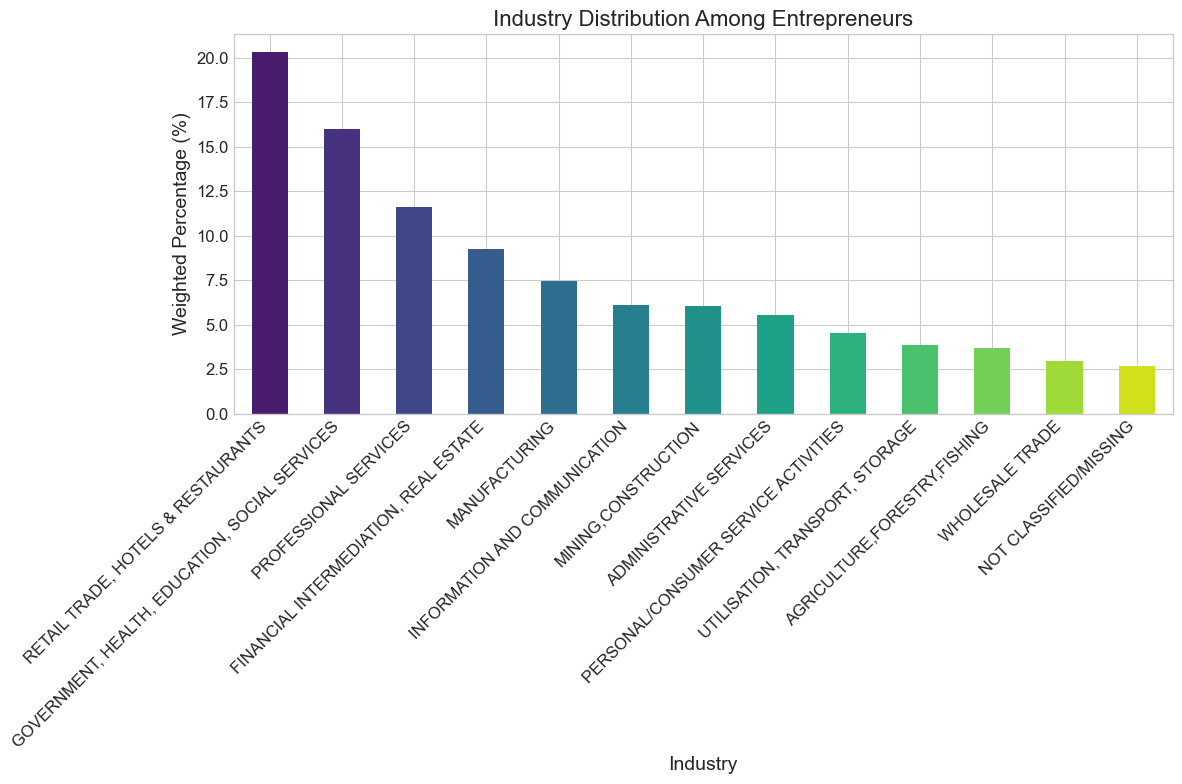

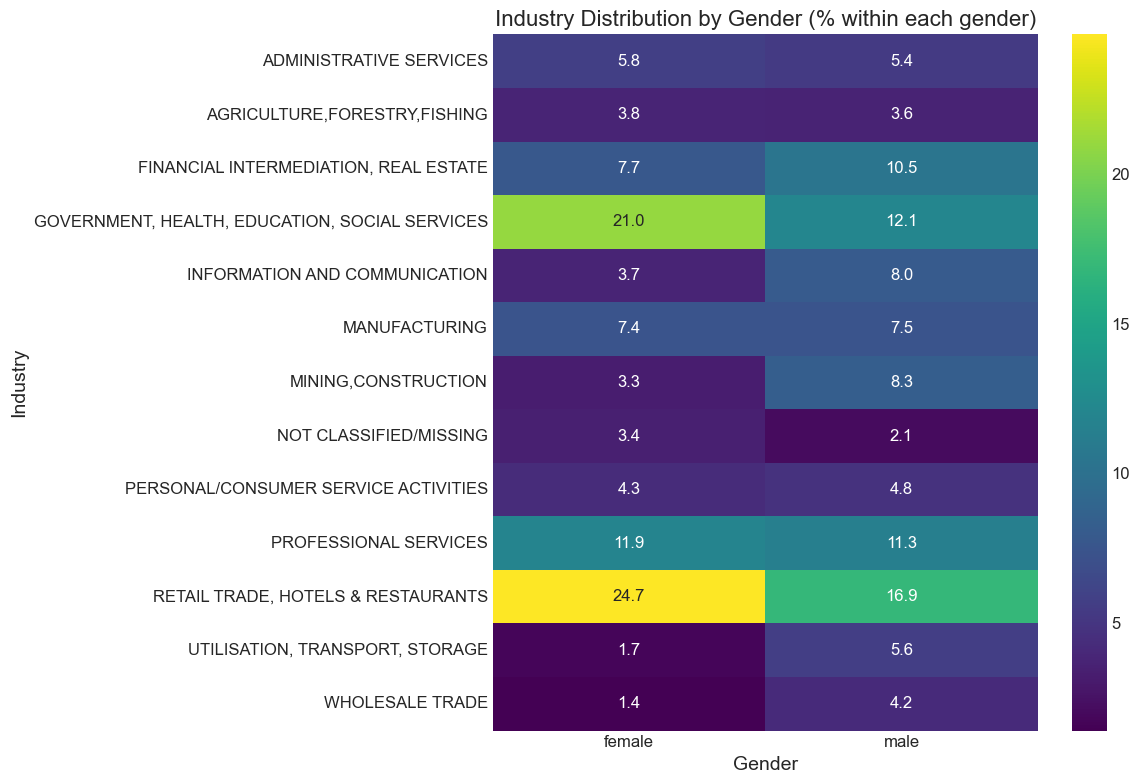

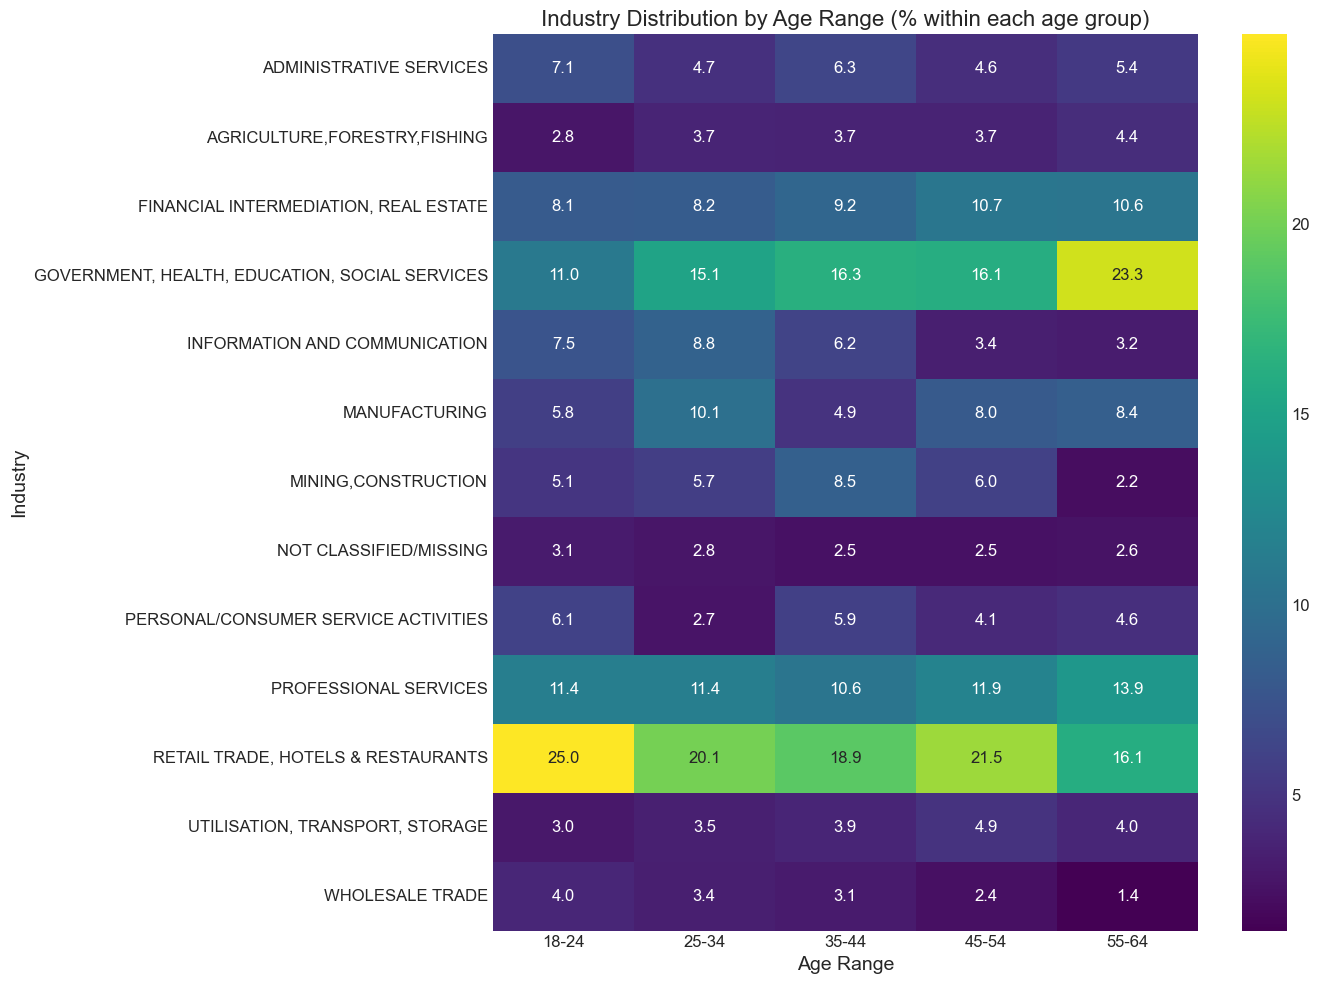

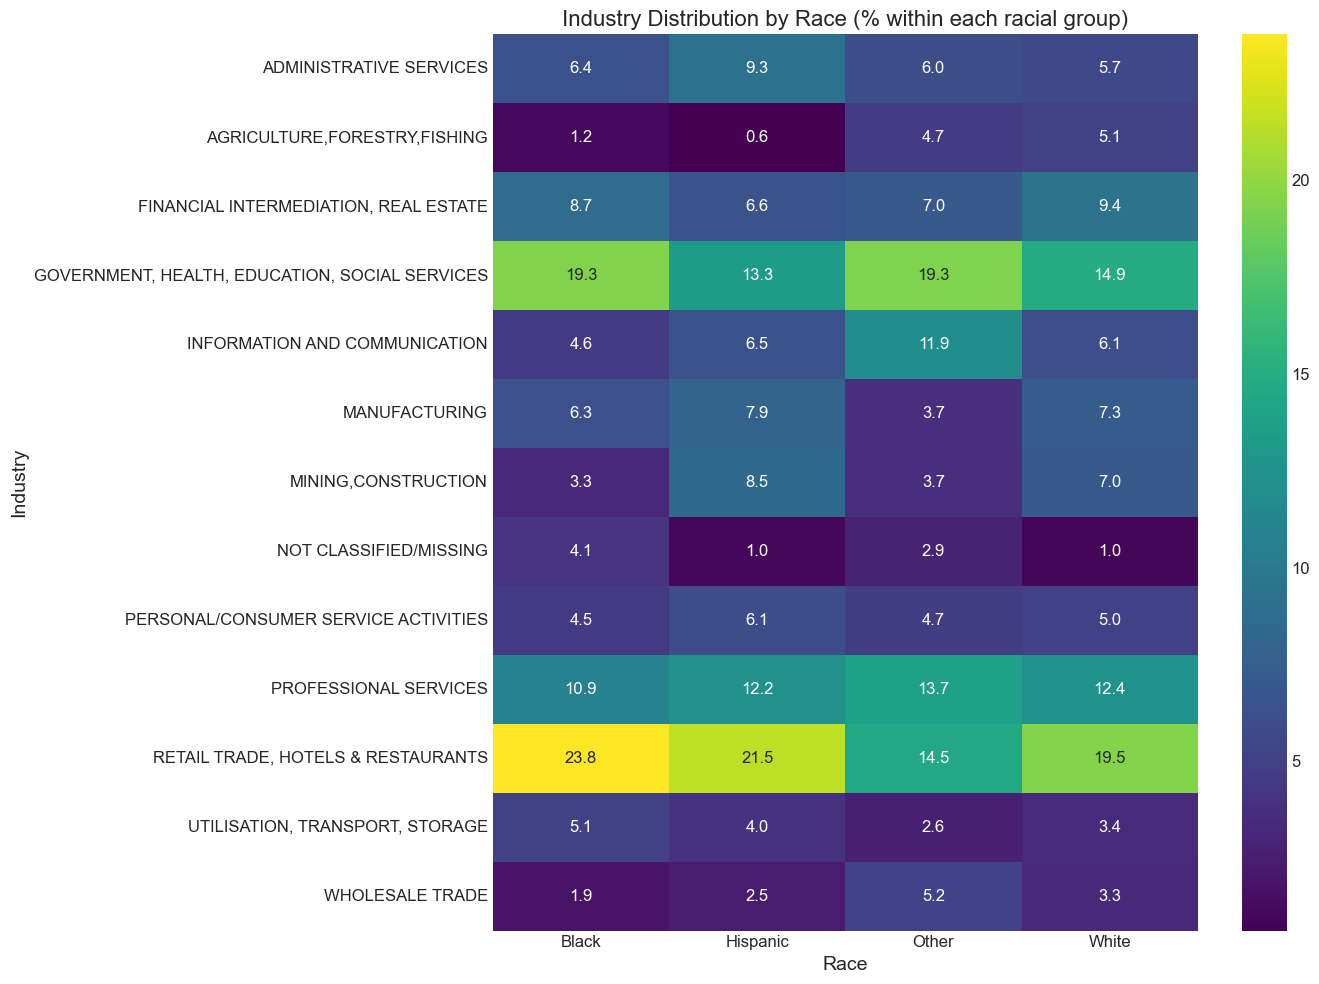

In [4]:
# 1.1 Overall weighted industry distribution
industry_dist = weighted_percentage(industry_data, 'new_entrepreneur_industry')

plt.figure(figsize=(12, 8))
industry_dist.plot(kind='bar', color=sns.color_palette('viridis', len(industry_dist)))
plt.title('Industry Distribution Among Entrepreneurs', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Weighted Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1.2 Industry distribution by gender
industry_by_gender = weighted_crosstab(
    industry_data,
    'new_entrepreneur_industry',
    'gender',
    normalize='columns'
)

plt.figure(figsize=(12, 8))
sns.heatmap(industry_by_gender, annot=True, cmap='viridis', fmt='.1f')
plt.title('Industry Distribution by Gender (% within each gender)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.tight_layout()
plt.show()

# 1.3 Industry distribution by age
industry_by_age = weighted_crosstab(
    industry_data,
    'new_entrepreneur_industry',
    'age_range',
    normalize='columns'
)

plt.figure(figsize=(14, 10))
sns.heatmap(industry_by_age, annot=True, cmap='viridis', fmt='.1f')
plt.title('Industry Distribution by Age Range (% within each age group)', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.tight_layout()
plt.show()

# 1.4 Industry distribution by race
industry_by_race = weighted_crosstab(
    industry_data.dropna(subset=['race']),
    'new_entrepreneur_industry',
    'race',
    normalize='columns'
)

plt.figure(figsize=(14, 10))
sns.heatmap(industry_by_race, annot=True, cmap='viridis', fmt='.1f')
plt.title('Industry Distribution by Race (% within each racial group)', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.tight_layout()
plt.show()

## 2. Industry Time Trends

Analyzing how industry preferences have changed over time.

<Figure size 1400x800 with 0 Axes>

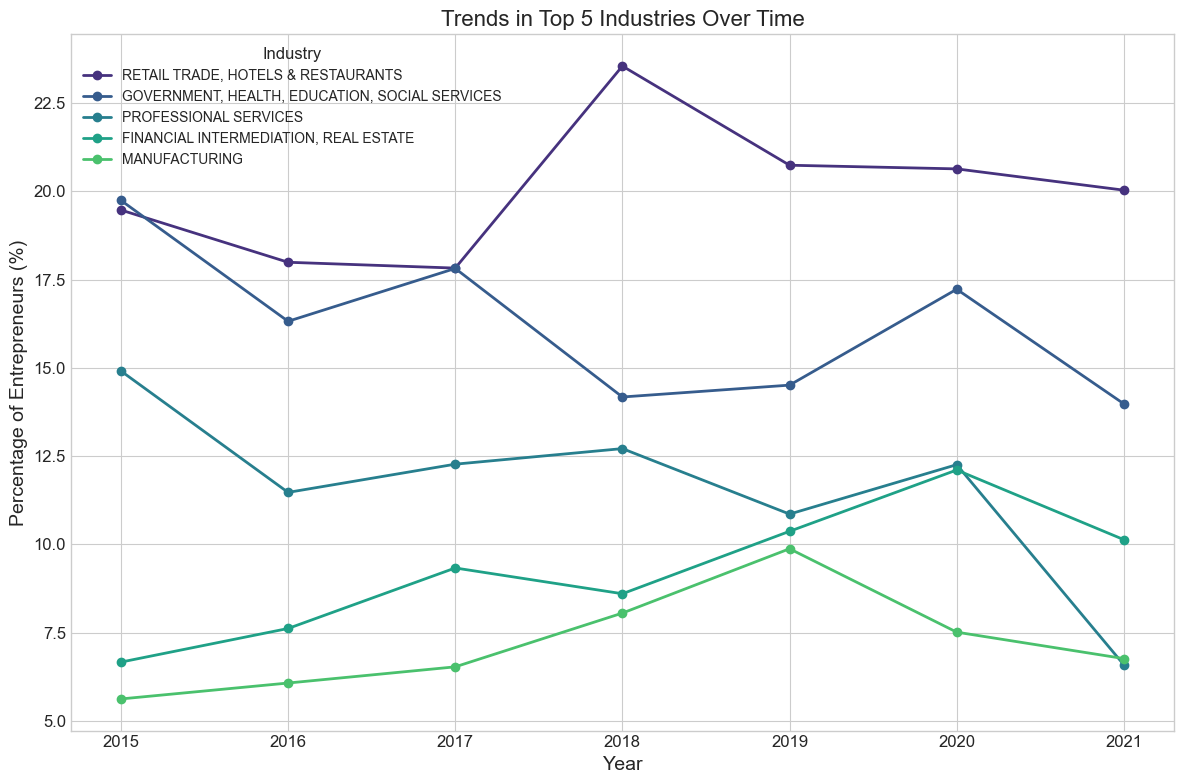

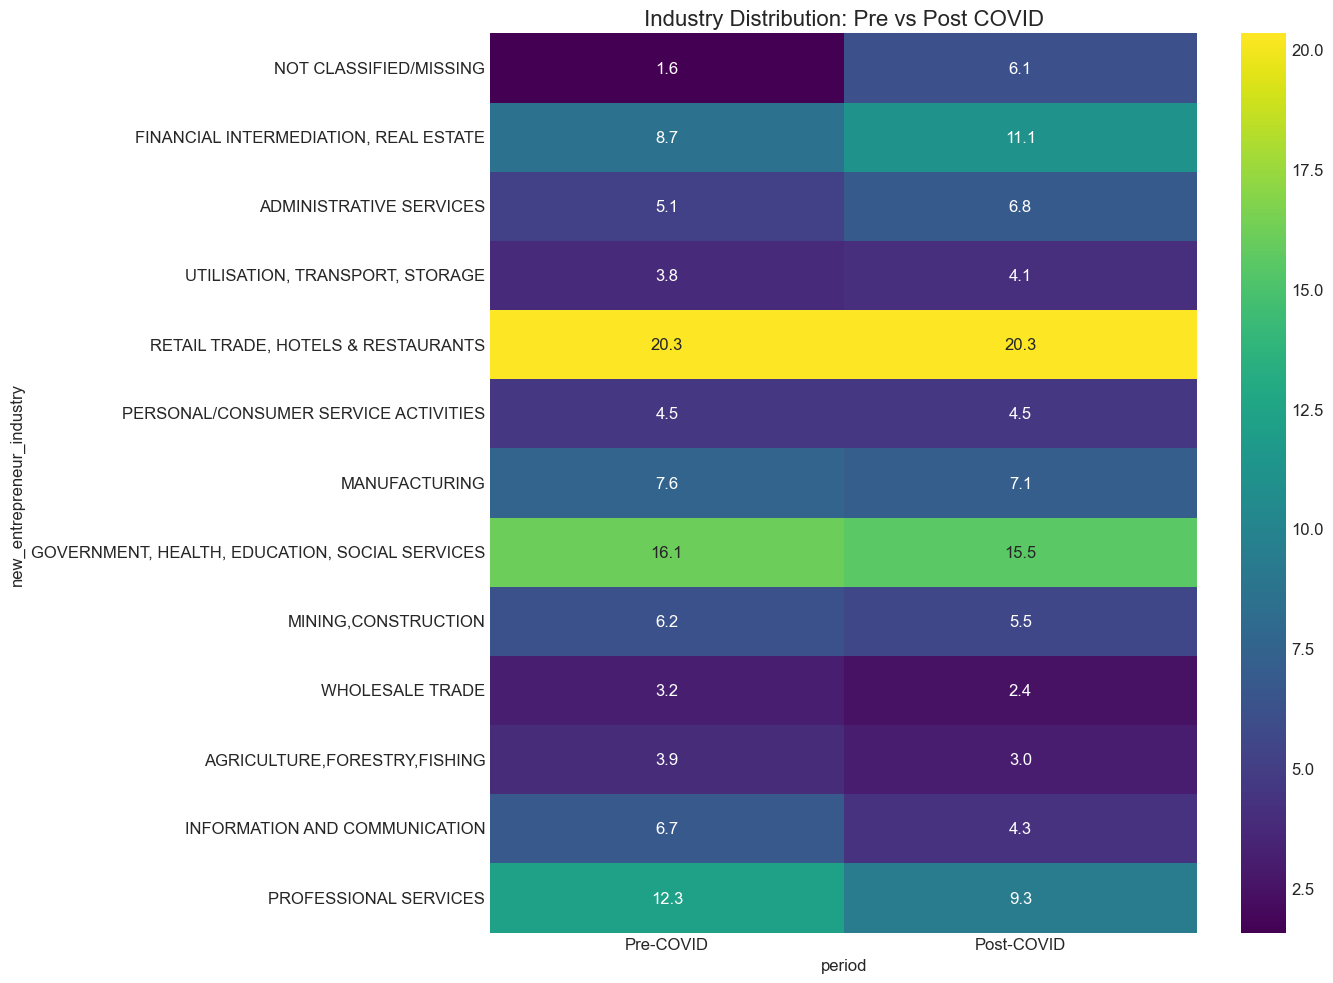

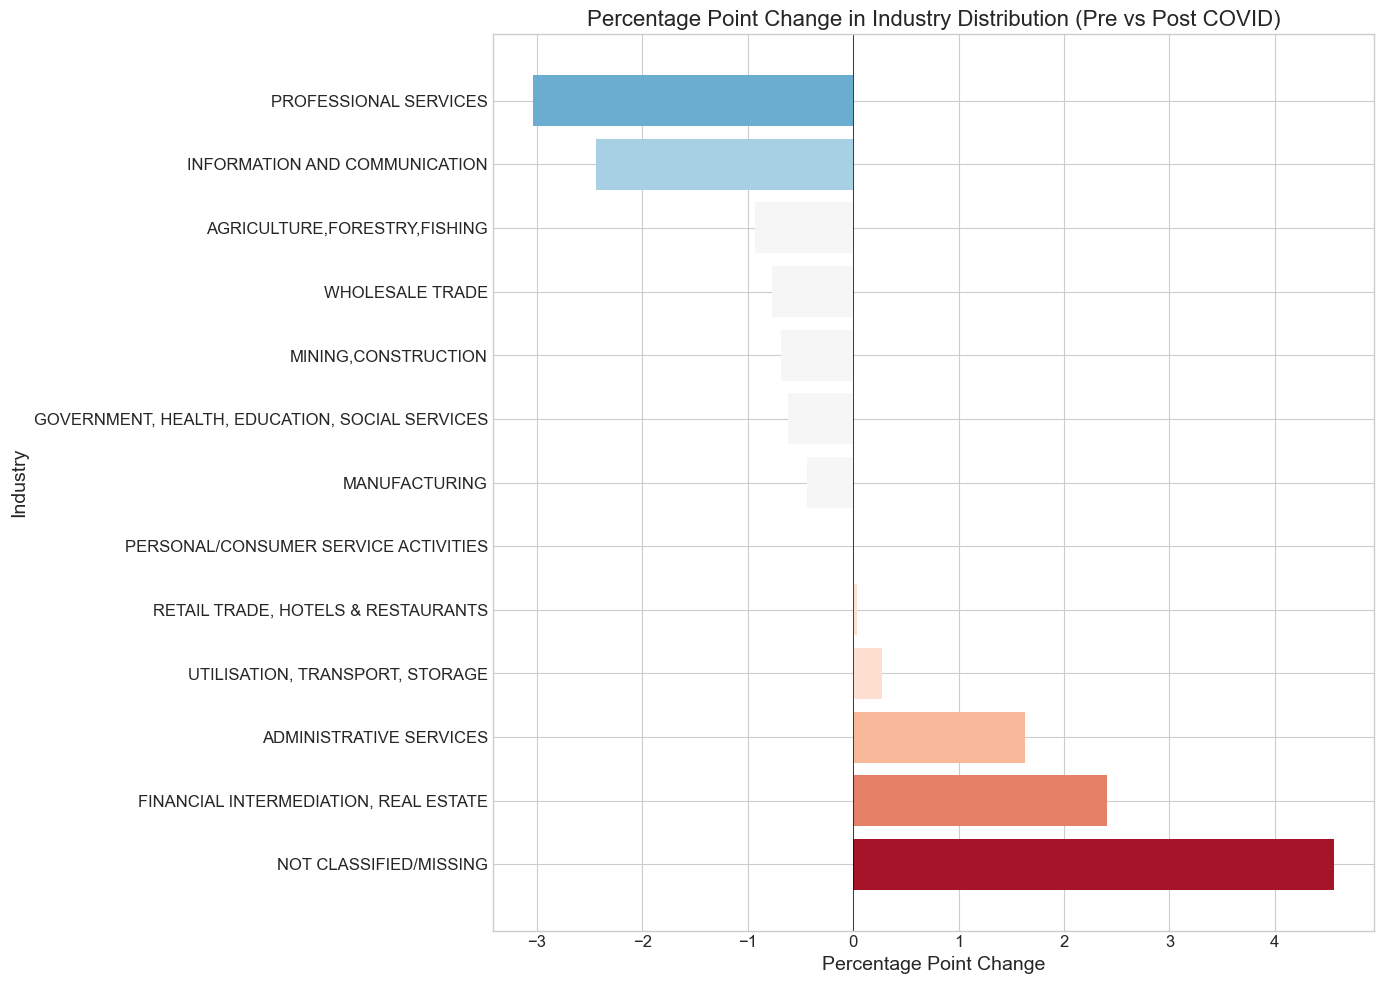

In [5]:
# 2.1 Industry distribution by year
industry_trends = weighted_crosstab(
    industry_data,
    'year',
    'new_entrepreneur_industry',
    normalize='index'
)

# Select top 5 industries for readability
top_industries = industry_dist.head(5).index.tolist()
industry_trends_top = industry_trends[top_industries]

plt.figure(figsize=(14, 8))
industry_trends_top.plot(marker='o', linewidth=2)
plt.title('Trends in Top 5 Industries Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Entrepreneurs (%)', fontsize=14)
plt.grid(True)
plt.legend(title='Industry', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

# 2.2 Pre/Post-COVID comparison
industry_data['period'] = industry_data['year'].apply(lambda x: 'Pre-COVID' if x < 2020 else 'Post-COVID')

covid_industry_trends = weighted_crosstab(
    industry_data,
    'new_entrepreneur_industry',
    'period',
    normalize='columns'
)

# Calculate percentage change
covid_industry_trends['change'] = covid_industry_trends['Post-COVID'] - covid_industry_trends['Pre-COVID']
covid_industry_trends = covid_industry_trends.sort_values('change', ascending=False)

plt.figure(figsize=(14, 10))
sns.heatmap(covid_industry_trends[['Pre-COVID', 'Post-COVID']], annot=True, cmap='viridis', fmt='.1f')
plt.title('Industry Distribution: Pre vs Post COVID', fontsize=16)
plt.tight_layout()
plt.show()

# Visualize changes
plt.figure(figsize=(14, 10))
bars = plt.barh(covid_industry_trends.index, covid_industry_trends['change'], 
         color=[sns.color_palette('RdBu_r', 11)[i] for i in 
                np.digitize(covid_industry_trends['change'], np.linspace(-5, 5, 11))])
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Percentage Point Change in Industry Distribution (Pre vs Post COVID)', fontsize=16)
plt.xlabel('Percentage Point Change', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## 3. Employment Impact Assessment

Analyzing job creation across different industries and entrepreneur types.

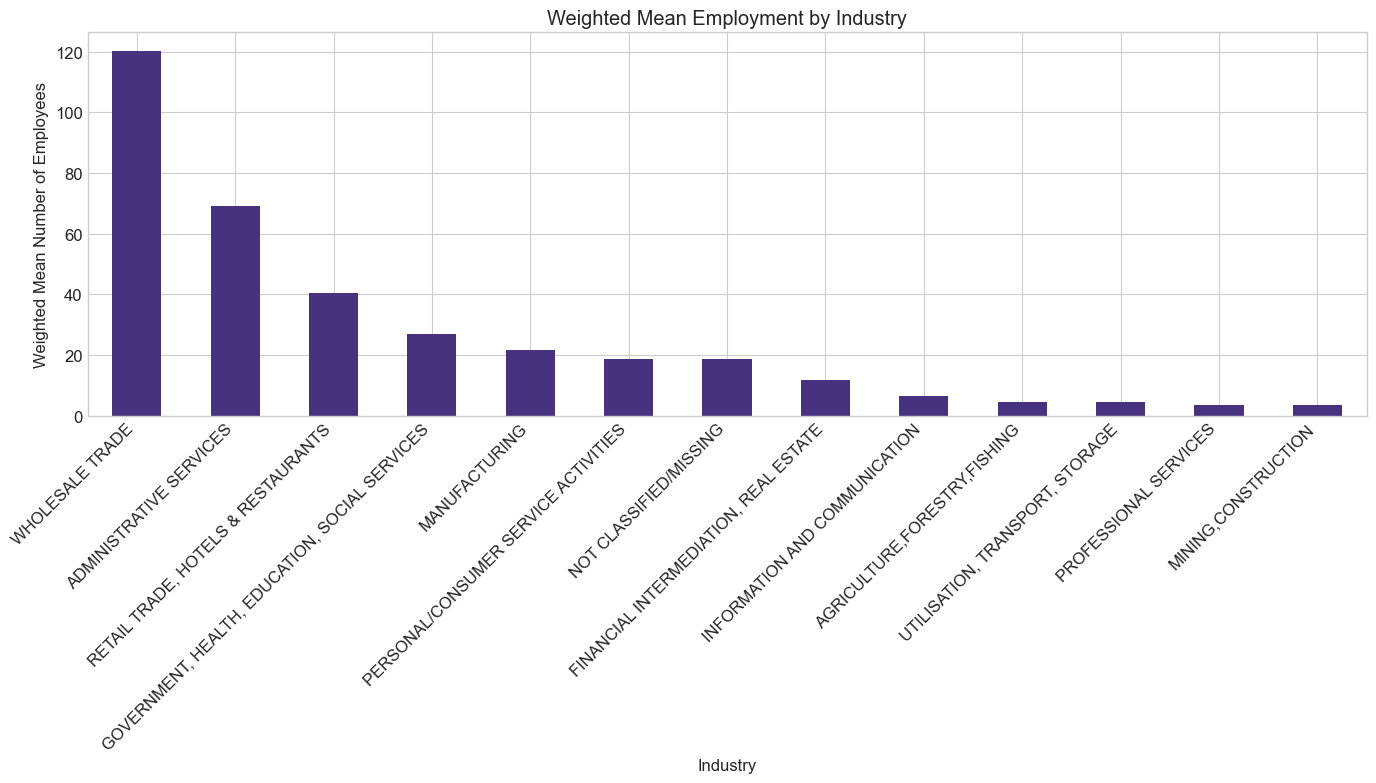

In [7]:
# 3.1 Current employment by industry
# Filter to valid employment data
employment_data = industry_data.dropna(subset=['new_entrepreneur_employees'])

# Calculate employment metrics by industry
employment_by_industry = employment_data.groupby('new_entrepreneur_industry').agg({
    'new_entrepreneur_employees': ['mean', 'median', 'sum', 'count'],
    'weight': 'sum'
})

# Calculate weighted means
weighted_employment = {}
for industry in employment_data['new_entrepreneur_industry'].unique():
    subset = employment_data[employment_data['new_entrepreneur_industry'] == industry]
    weighted_employment[industry] = np.average(
        subset['new_entrepreneur_employees'], 
        weights=subset['weight']
    )

weighted_empl_df = pd.DataFrame.from_dict(weighted_employment, orient='index', columns=['weighted_mean_employees'])

# Fix the merge error by flattening the multi-index in employment_by_industry
employment_by_industry = employment_by_industry.copy()
employment_by_industry.columns = ['_'.join(col).strip() for col in employment_by_industry.columns.values]

# Now join the DataFrames (both have single-level columns)
employment_by_industry = employment_by_industry.join(weighted_empl_df)
employment_by_industry = employment_by_industry.sort_values('weighted_mean_employees', ascending=False)

plt.figure(figsize=(14, 8))
employment_by_industry['weighted_mean_employees'].plot(kind='bar')
plt.title('Weighted Mean Employment by Industry')
plt.ylabel('Weighted Mean Number of Employees')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

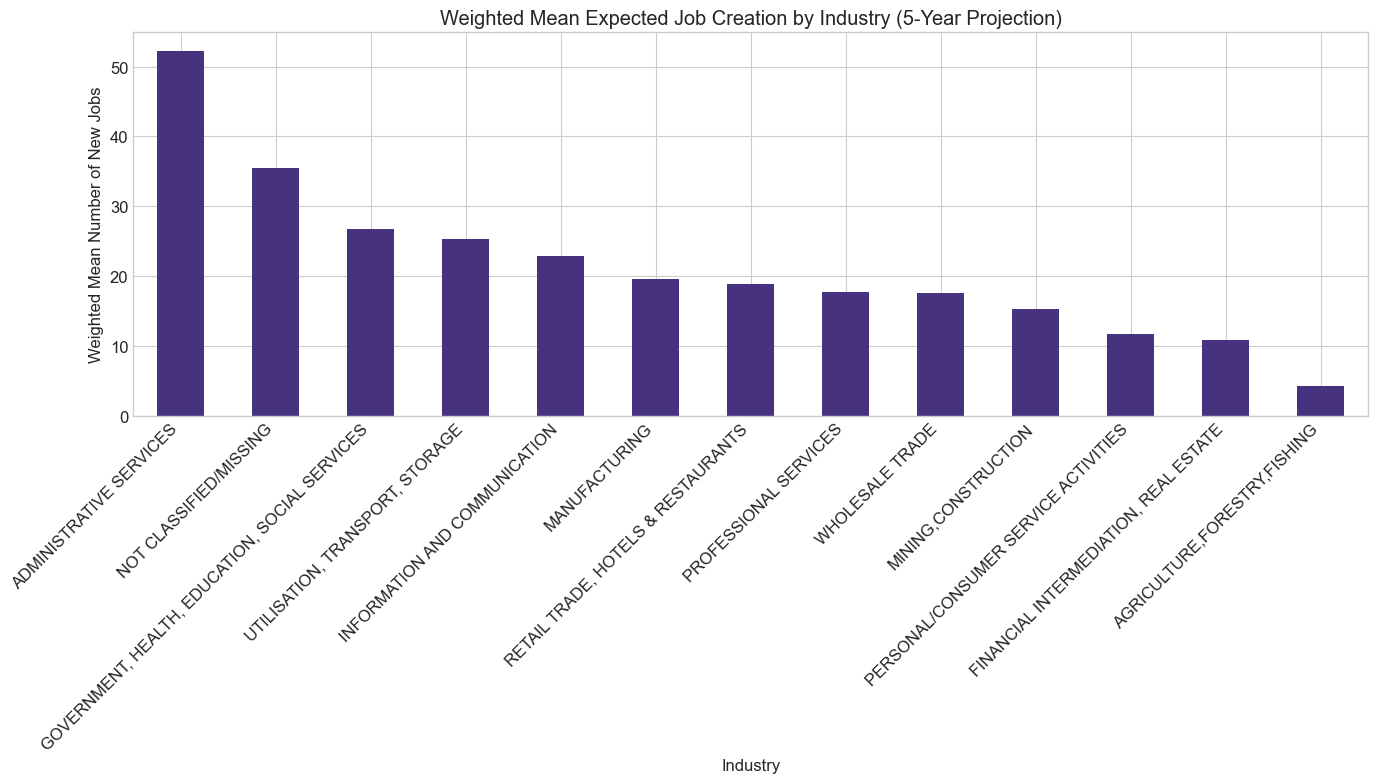

In [13]:
# 3.2 Job creation by industry
# Filter to valid job creation data
job_data = industry_data.dropna(subset=['new_entrepreneur_new_jobs'])

# Calculate job creation metrics by industry
jobs_by_industry = job_data.groupby('new_entrepreneur_industry').agg({
    'new_entrepreneur_new_jobs': ['mean', 'median', 'sum', 'count'],
    'weight': 'sum'
})

# Calculate weighted means for jobs
weighted_jobs = {}
for industry in job_data['new_entrepreneur_industry'].unique():
    subset = job_data[job_data['new_entrepreneur_industry'] == industry]
    weighted_jobs[industry] = np.average(
        subset['new_entrepreneur_new_jobs'], 
        weights=subset['weight']
    )

weighted_jobs_df = pd.DataFrame.from_dict(weighted_jobs, orient='index', columns=['weighted_mean_jobs'])

# Fix the multi-index columns to match employment_by_industry
jobs_by_industry = jobs_by_industry.copy()
jobs_by_industry.columns = ['_'.join(col).strip() for col in jobs_by_industry.columns.values]

# Join the DataFrames
jobs_by_industry = jobs_by_industry.join(weighted_jobs_df)
jobs_by_industry = jobs_by_industry.sort_values('weighted_mean_jobs', ascending=False)

# Calculate job creation efficiency (jobs per employee)
combined_metrics = pd.DataFrame({
    'weighted_mean_employees': employment_by_industry['weighted_mean_employees'],
    'weighted_mean_jobs': jobs_by_industry['weighted_mean_jobs']
}).dropna()

combined_metrics['job_creation_efficiency'] = combined_metrics['weighted_mean_jobs'] / combined_metrics['weighted_mean_employees']

# Visualize job creation by industry
plt.figure(figsize=(14, 8))
jobs_by_industry['weighted_mean_jobs'].plot(kind='bar')
plt.title('Weighted Mean Expected Job Creation by Industry (5-Year Projection)')
plt.ylabel('Weighted Mean Number of New Jobs')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

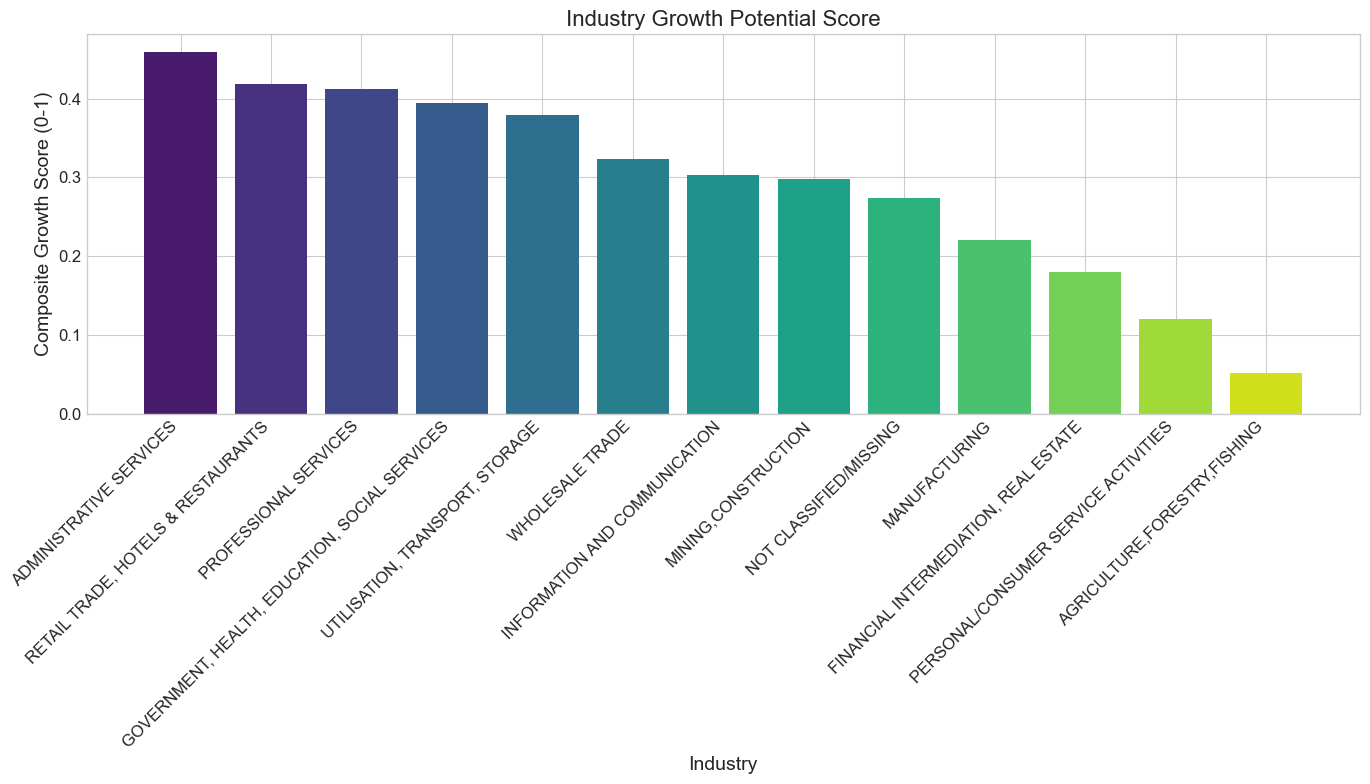

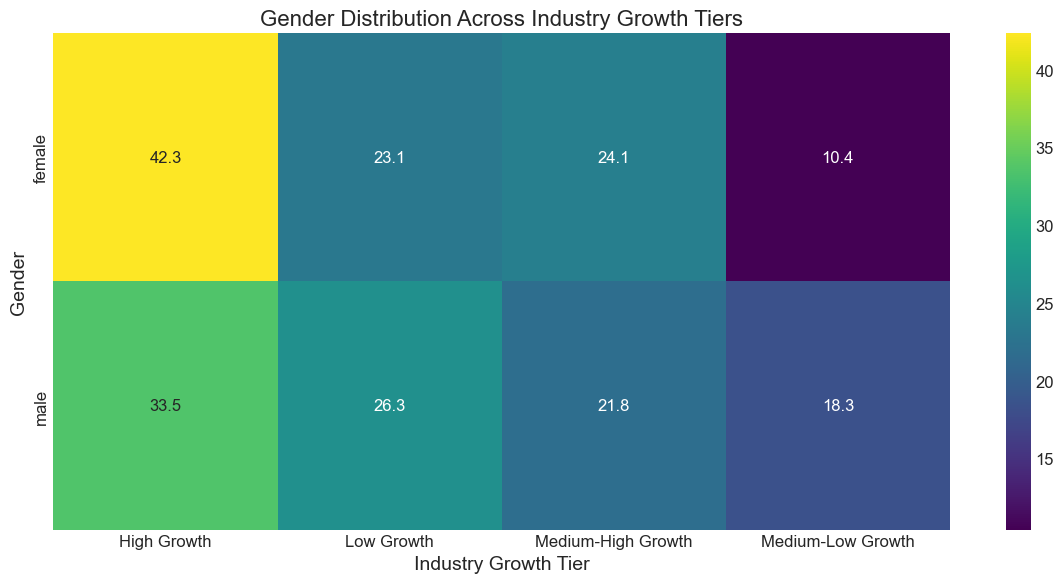

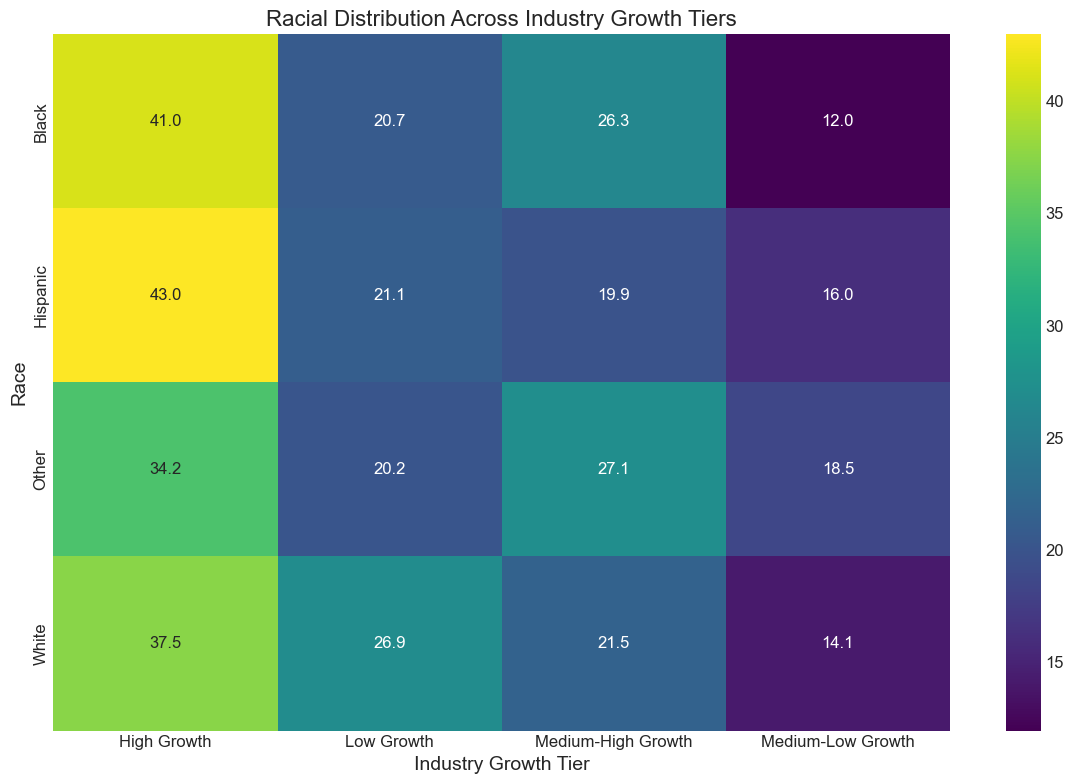

In [ ]:
# 4.1 Create a multi-factor growth score for each industry
# Prepare data
growth_metrics = pd.DataFrame({
    'entrepreneur_pct': industry_dist,
    'mean_employees': employment_by_industry.get('weighted_mean_employees', pd.Series()),
    'mean_new_jobs': jobs_by_industry.get('weighted_mean_jobs', pd.Series()),
    'job_efficiency': combined_metrics.get('job_creation_efficiency', pd.Series()),
}).dropna()

# Normalize each metric to 0-1 scale
normalized_metrics = growth_metrics.copy()
for col in normalized_metrics.columns:
    normalized_metrics[col] = (normalized_metrics[col] - normalized_metrics[col].min()) / \
                             (normalized_metrics[col].max() - normalized_metrics[col].min())

# Calculate composite growth score
normalized_metrics['growth_score'] = normalized_metrics.mean(axis=1)
growth_scores = normalized_metrics.sort_values('growth_score', ascending=False)

# Visualize the growth score
plt.figure(figsize=(14, 8))
bars = plt.bar(
    growth_scores.index, 
    growth_scores['growth_score'], 
    color=sns.color_palette('viridis', len(growth_scores))
)
plt.title('Industry Growth Potential Score', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Composite Growth Score (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.2 Categorize industries into growth tiers
quartiles = np.percentile(growth_scores['growth_score'], [25, 50, 75])
growth_scores['growth_tier'] = pd.cut(
    growth_scores['growth_score'],
    bins=[0, quartiles[0], quartiles[1], quartiles[2], 1],
    labels=['Low Growth', 'Medium-Low Growth', 'Medium-High Growth', 'High Growth']
)

# 4.3 Demographic representation in high-growth industries
# Merge growth tiers back to the industry data
industry_growth_map = growth_scores['growth_tier'].to_dict()
industry_data['industry_growth_tier'] = industry_data['new_entrepreneur_industry'].map(industry_growth_map)

# Analyze demographic representation by growth tier
gender_by_growth = weighted_crosstab(
    industry_data.dropna(subset=['industry_growth_tier']),
    'gender',
    'industry_growth_tier',
    normalize='index'
)

plt.figure(figsize=(12, 6))
sns.heatmap(gender_by_growth, annot=True, cmap='viridis', fmt='.1f')
plt.title('Gender Distribution Across Industry Growth Tiers', fontsize=16)
plt.xlabel('Industry Growth Tier', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.tight_layout()
plt.show()

# Race by growth tier
race_by_growth = weighted_crosstab(
    industry_data.dropna(subset=['industry_growth_tier', 'race']),
    'race',
    'industry_growth_tier',
    normalize='index'
)

plt.figure(figsize=(12, 8))
sns.heatmap(race_by_growth, annot=True, cmap='viridis', fmt='.1f')
plt.title('Racial Distribution Across Industry Growth Tiers', fontsize=16)
plt.xlabel('Industry Growth Tier', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.tight_layout()
plt.show()

# Summary of Key Findings

## Industry Distribution
- Retail Trade & Hospitality is the dominant industry choice (20% of entrepreneurs)
- Healthcare & Education ranks second (16% of entrepreneurs)
- Professional Services follows at 12% of entrepreneurs
- Significant gender differences exist:
  - Women have higher representation in Retail (25% vs 17%) and Healthcare/Education (21% vs 12%)
  - Men dominate in Construction (8% vs 3%) and Information/Communication (8% vs 4%)

## Employment Impact
- Wholesale Trade has the highest average employees per business (120)
- Administrative Services (70) and Retail/Restaurants (40) also show strong current employment
- Administrative Services leads in projected job creation (52 new jobs per business)
- Government/Health/Education ranks third in future job creation (27 jobs)
- Agriculture/Forestry/Fishing shows the lowest job creation potential (4 jobs)
- Job creation efficiency (jobs per employee) is highest in Administrative Services

## High-Growth Industries
- Administrative Services leads with the highest composite growth score (0.45)
- Retail/Restaurants and Professional Services tie for second (0.41) in overall growth potential
- Information/Communication showed a significant decline (-2.4%) post-COVID
- Financial/Real Estate experienced substantial growth (+2.4%) post-COVID
- Agriculture/Forestry/Fishing shows the lowest growth potential (0.05)

## Demographic Representation in Growth Industries
- Hispanic (43%) and Black (41%) entrepreneurs have higher representation in high-growth industries
- Women show stronger presence in high-growth industries (42%) than men (34%)
- Government/Health/Education shows higher representation among older entrepreneurs (55-64)

## Implications
- Administrative Services, Retail, and Professional Services offer the strongest growth opportunities for entrepreneurs
- Targeted support for underrepresented groups in high-potential industries could maximize economic impact
- Financial/Real Estate and Administrative Services show resilience and growth post-pandemic
- Industry preferences vary significantly by demographic characteristics, suggesting tailored approaches to entrepreneurship development
- Job creation potential differs greatly between industries, with some industries creating 10x more jobs than others